# Boundary Detection using Contour Tracing

When we join all the points on the boundary of an object, we get a contour. Typically, a specific contour refers to boundary pixels that have the same color and intensity. OpenCV makes it really easy to find and draw contours in images. It provides two simple functions:

1. findContours()
2. drawContours()
  
Also, it has two different algorithms for contour detection:

1. CHAIN_APPROX_SIMPLE
2. CHAIN_APPROX_NONE

### Step 1: Read the Image and convert it to Grayscale Format

Read the image and convert the image to grayscale format. Converting the image to grayscale is very important as it prepares the image for the next step. Converting the image to a single channel grayscale image is important for thresholding, which in turn is necessary for the contour detection algorithm to work properly.

In [2]:
# Reading Image and converting to grayscale using OpenCV
import cv2
from PIL import Image
import numpy as np
# Load the image
image = cv2.imread('Test_Images/Grayscale_Image.jpg')
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Save the grayscale image
gray_image_pil = Image.fromarray(gray_image)
gray_image_pil.save("grayscale_image.jpg")
gray_image_pil.show()

### Apply Binary Thresholding

While finding contours, first always apply binary thresholding or Canny edge detection to the grayscale image. Here, we will apply binary thresholding.

This converts the image to black and white, highlighting the objects-of-interest to make things easy for the contour-detection algorithm. Thresholding turns the border of the object in the image completely white, with all pixels having the same intensity. The algorithm can now detect the borders of the objects from these white pixels.

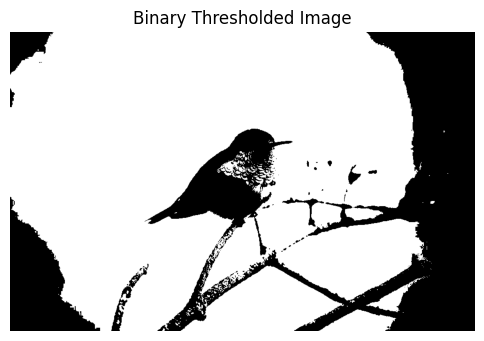

In [3]:
import matplotlib.pyplot as plt
# Applying Binary Thresholding
ret, binary_thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
# Visualize the binary thresholded image
binary_thresholded_image_pil = Image.fromarray(binary_thresholded_image)
plt.figure(figsize=(6, 6))
plt.imshow(binary_thresholded_image_pil, cmap='gray')
plt.axis('off')
plt.title('Binary Thresholded Image')
plt.show()


### Drawing Contours using CHAIN_APPROX_NONE

Start with the findContours() function. It has three required arguments. 

- image: The binary input image obtained in the previous step.
- mode: This is the contour-retrieval mode. We provided this as RETR_TREE, which means the algorithm will retrieve all possible contours from - the binary image. More contour retrieval modes are available, we will be discussing them too. You can learn more details on these options here. 

method: This defines the contour-approximation method. In this example, we will use CHAIN_APPROX_NONE.Though slightly slower than CHAIN_APPROX_SIMPLE, we will use this method here to store ALL contour points.

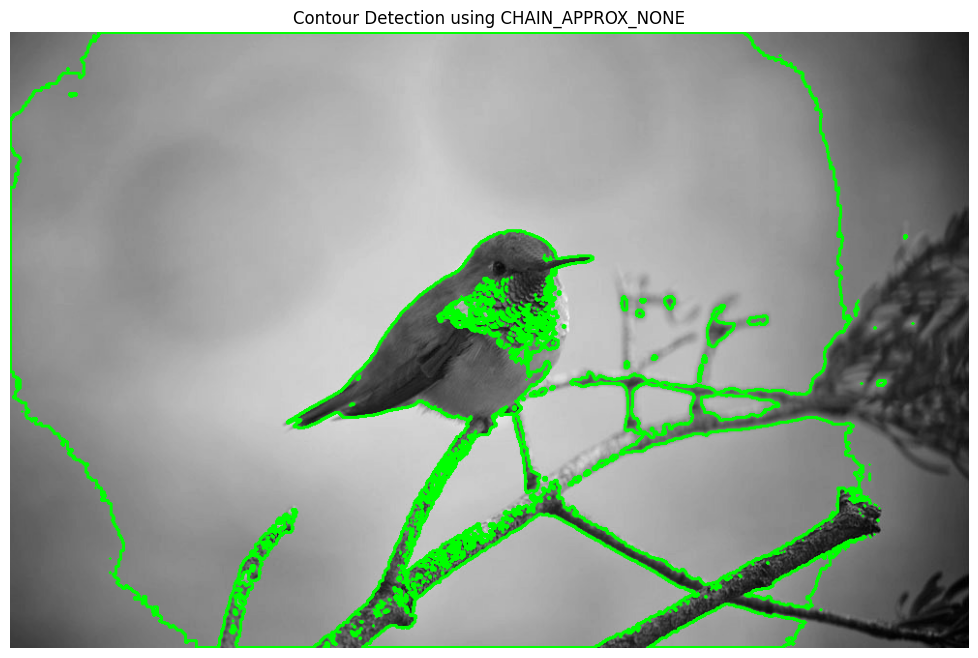

In [4]:
# Drawing Contours using CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(binary_thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw all contours in green
# Convert to PIL Image for display
contour_image_pil = Image.fromarray(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(15, 8))
plt.imshow(contour_image_pil)
plt.title('Contour Detection using CHAIN_APPROX_NONE')
plt.axis('off')
plt.show() 

### Contour Detection using CHAIN_APPROX_SIMPLE

The CHAIN_APPROX_SIMPLE  algorithm compresses horizontal, vertical, and diagonal segments along the contour and leaves only their end points. This means that any of the points along the straight paths will be dismissed, and we will be left with only the end points. For example, consider a contour, along a rectangle. All the contour points, except the four corner points will be dismissed. This method is faster than the CHAIN_APPROX_NONE because the algorithm does not store all the points, uses less memory, and therefore, takes less time to execute.


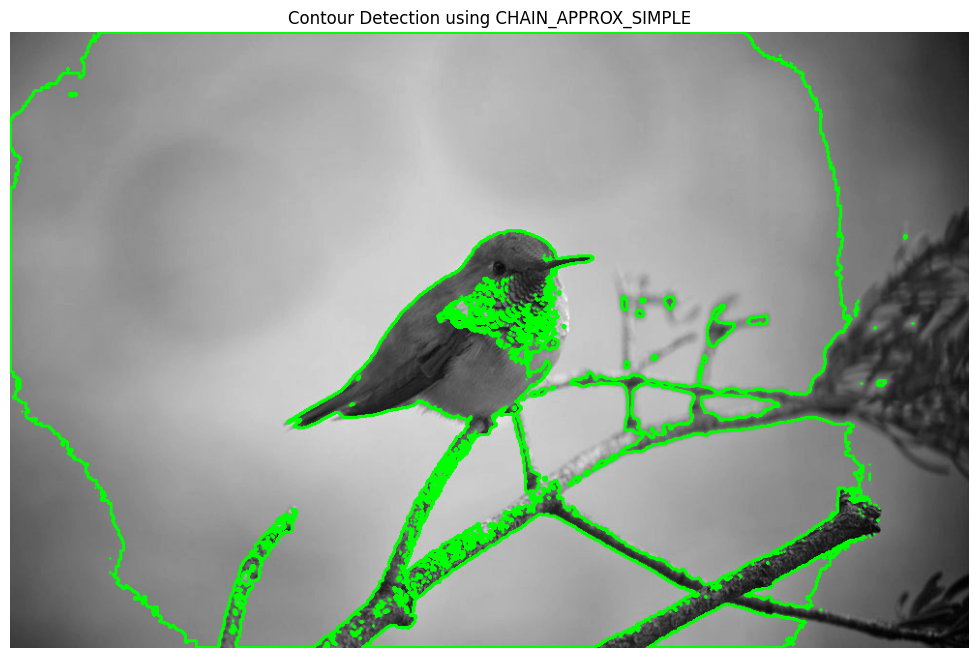

In [5]:
# Contour Detection using CHAIN_APPROX_SIMPLE
# Draw contours on the original image using CHAIN_APPROX_SIMPLE
contours_simple, hierarchy_simple = cv2.findContours(binary_thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image_simple = image.copy()
cv2.drawContours(contour_image_simple, contours_simple, -1, (0, 255, 0), 2)  # Draw all contours in green
# Convert to PIL Image for display
contour_image_simple_pil = Image.fromarray(cv2.cvtColor(contour_image_simple, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(15, 8))
plt.imshow(contour_image_simple_pil)
plt.title('Contour Detection using CHAIN_APPROX_SIMPLE')
plt.axis('off')
plt.show()


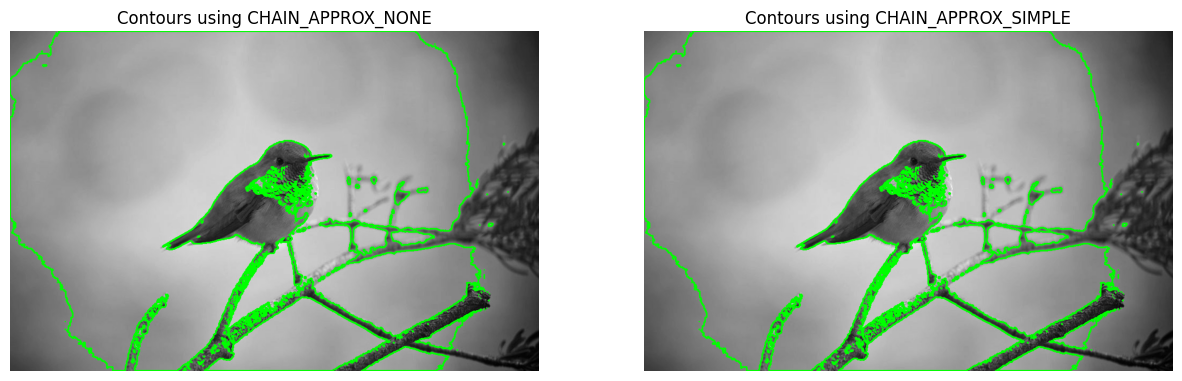

In [6]:
# Comparision of the Boundaries using CHAIN_APPROX_NONE and CHAIN_APPROX_SIMPLE
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(contour_image_pil)
plt.title('Contours using CHAIN_APPROX_NONE')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(contour_image_simple_pil)
plt.title('Contours using CHAIN_APPROX_SIMPLE')
plt.axis('off')
plt.show()


### Contour Detection using CHAIN_APPROX_SIMPLE using RGB Image Channels

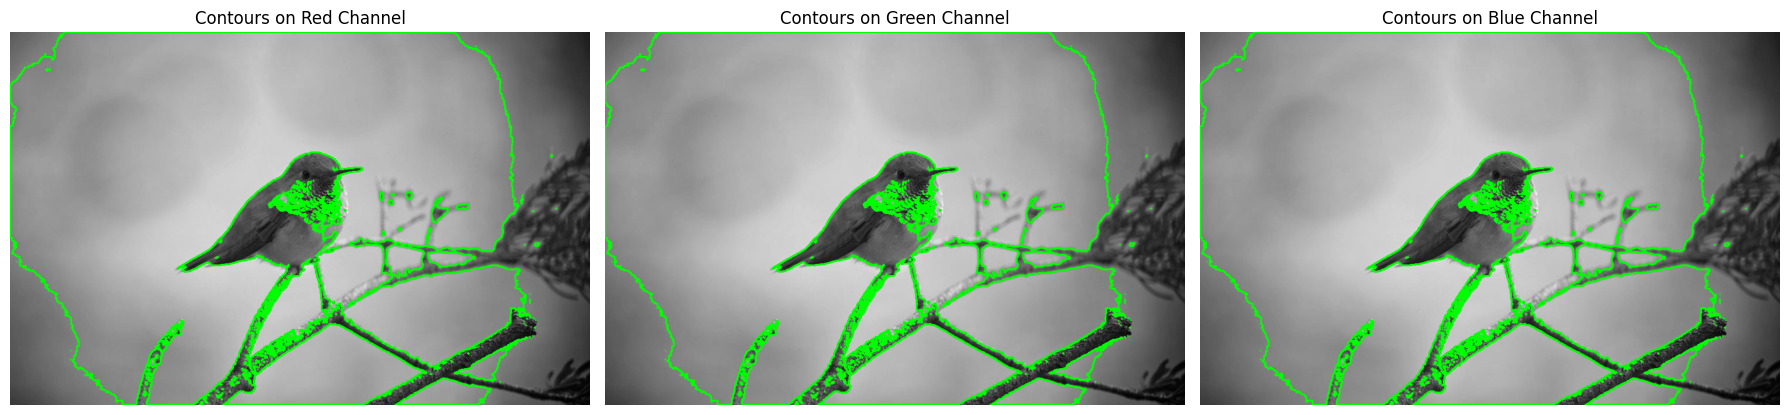

In [8]:
# Splitting the RGB Channels and applying CHAIN_APPROX_SIMPLE
# Split the original image into its RGB channels
r, g, b = cv2.split(image)
# Apply binary thresholding to each channel
ret_r, binary_r = cv2.threshold(r, 127, 255, cv2.THRESH_BINARY)
ret_g, binary_g = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY)
ret_b, binary_b = cv2.threshold(b, 127, 255, cv2.THRESH_BINARY)
# Find contours for each channel
contours_r, hierarchy_r = cv2.findContours(binary_r, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_g, hierarchy_g = cv2.findContours(binary_g, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv2.findContours(binary_b, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours for each channel
contour_image_r = image.copy()
contour_image_g = image.copy()
contour_image_b = image.copy()
# Draw Contours in green
cv2.drawContours(contour_image_r, contours_r, -1, (0, 255, 0), 2)  # Red channel
cv2.drawContours(contour_image_g, contours_g, -1, (0, 255, 0), 2)  # Green channel
cv2.drawContours(contour_image_b, contours_b, -1, (0, 255, 0), 2)  # Blue channel
# Convert to PIL Image for display
contour_image_r_pil = Image.fromarray(cv2.cvtColor(contour_image_r, cv2.COLOR_BGR2RGB))
contour_image_g_pil = Image.fromarray(cv2.cvtColor(contour_image_g, cv2.COLOR_BGR2RGB))
contour_image_b_pil = Image.fromarray(cv2.cvtColor(contour_image_b, cv2.COLOR_BGR2RGB))

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(contour_image_r_pil)
plt.title('Contours on Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contour_image_g_pil)
plt.title('Contours on Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(contour_image_b_pil)
plt.title('Contours on Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()
